In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

In [2]:
sns.set(style='white', palette='colorblind', font_scale=1.4, 
        rc={'figure.figsize':(12,9)})

In [3]:
boston = load_boston()

In [4]:
df = pd.DataFrame(data = np.c_[boston.data, boston.target],
                  columns = boston.feature_names.tolist() + ['target'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
rf = RandomForestRegressor(random_state=9).fit(df.iloc[:, :-1], df.target)

In [9]:
pd.Series(index=df.columns[:-1], data=rf.feature_importances_).sort_values(ascending=False)

RM         0.533524
LSTAT      0.282185
DIS        0.074601
NOX        0.023489
CRIM       0.021514
PTRATIO    0.019394
AGE        0.013095
B          0.011992
TAX        0.010969
INDUS      0.004472
RAD        0.002256
CHAS       0.001808
ZN         0.000702
dtype: float64

In [10]:
from pycebox.ice import ice, ice_plot

In [11]:
# construct a DataFrame of ice curves for each feature
ice_dict = {}
for col in df.columns[:-1]:
    ice_df = ice(df.iloc[:, :-1], col, rf.predict)
    ice_dict[col] = ice_df

In [12]:
ice_dict['RM'].head()

data_RM    3.561    3.863    4.138             4.368    4.519    4.628  \
CRIM    4.55587  13.52220 18.49820 20.71620 20.08490 45.74610 18.81100   
ZN          0.0      0.0      0.0      0.0      0.0      0.0      0.0    
INDUS      18.10    18.10    18.10    18.10    18.10    18.10    18.10   
CHAS         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
NOX        0.718    0.631    0.668    0.659    0.700    0.693    0.597   
AGE        87.9     100.0    100.0    100.0    91.2     100.0    100.0   
DIS       1.6132   1.5106   1.1370   1.1781   1.4395   1.6582   1.5539   
RAD         24.0     24.0     24.0     24.0     24.0     24.0     24.0   
TAX        666.0    666.0    666.0    666.0    666.0    666.0    666.0   
PTRATIO     20.2     20.2     20.2     20.2     20.2     20.2     20.2   
B         354.70   131.42   396.90   370.22   285.83   88.27    28.79    
LSTAT      7.12     13.33    37.97    23.34    30.63    36.98    34.37   
RM                                                                       
3.561      26.86    22.33    13.95     12.4     9.72     7.71    16.53   
3.863      25.61    21.89    13.95     12.4     9.72     7.71    16.53   
4.138      25.61    21.89    13.95     12.4     9.72     7.71    16.53   
4.368      25.61    21.89    13.95     12.4     9.72     7.71    16.53   
4.519      25.61    21.89    13.95     12.4     9.72     7.71    16.53   

data_RM    4.652    4.880    4.903   ...       8.247    8.259    8.266  \
CRIM    24.39380 14.33370 2.77974    ...    0.33147  0.36894  0.31533    
ZN          0.0      0.0      0.0    ...        0.0      22.0     0.0    
INDUS      18.10    18.10    19.58   ...       6.20     5.86     6.20    
CHAS         0.0      0.0      0.0   ...         0.0      0.0      0.0   
NOX        0.700    0.700    0.871   ...       0.507    0.431    0.504   
AGE        100.0    100.0    97.8    ...       70.4     8.4      78.3    
DIS       1.4672   1.5895   1.3459   ...      3.6519   8.9067   2.8944   
RAD         24.0     24.0     5.0    ...        8.0      7.0      8.0    
TAX        666.0    666.0    403.0   ...       307.0    330.0    307.0   
PTRATIO     20.2     20.2     14.7   ...        17.4     19.1     17.4   
B         396.90   372.92   396.90   ...      378.95   396.90   385.05   
LSTAT      28.28    30.62    29.29   ...       3.95     3.54     4.14    
RM                                   ...                                 
3.561      10.11    10.22    13.98   ...       25.32    24.09    26.17   
3.863      10.11    10.22    13.98   ...       25.00    23.52    25.85   
4.138      10.11    10.22    13.98   ...       25.00    23.52    25.85   
4.368      10.11    10.22    13.98   ...       25.00    23.52    25.85   
4.519      10.11    10.22    13.98   ...       25.00    23.52    25.85   

data_RM    8.297    8.337    8.375    8.398    8.704    8.725    8.780  
CRIM    0.57834  0.57529  1.51902  0.52014  0.61154  0.52693  3.47428   
ZN          20.0     0.0      0.0      20.0     20.0     0.0      0.0   
INDUS      3.97     6.20     19.58    3.97     3.97     6.20     18.10  
CHAS         0.0      0.0      1.0      0.0      0.0      0.0      1.0  
NOX        0.575    0.507    0.605    0.647    0.647    0.504    0.718  
AGE        67.0     73.3     93.9     91.5     86.9     83.0     82.9   
DIS       2.4216   3.8384   2.1620   2.2885   1.8010   2.8944   1.9047  
RAD         5.0      8.0      5.0      5.0      5.0      8.0      24.0  
TAX        264.0    307.0    403.0    264.0    264.0    307.0    666.0  
PTRATIO     13.0     17.4     14.7     13.0     13.0     17.4     20.2  
B         384.54   385.91   388.45   386.86   389.70   382.00   354.55  
LSTAT      7.44     2.47     3.32     5.91     5.12     4.63     5.29   
RM                                                                      
3.561      24.15    25.32    26.37    24.12    25.72    25.97    28.66  
3.863      23.66    25.00    26.00    24.01    25.23    25.65    27.44  
4.138      23.66  

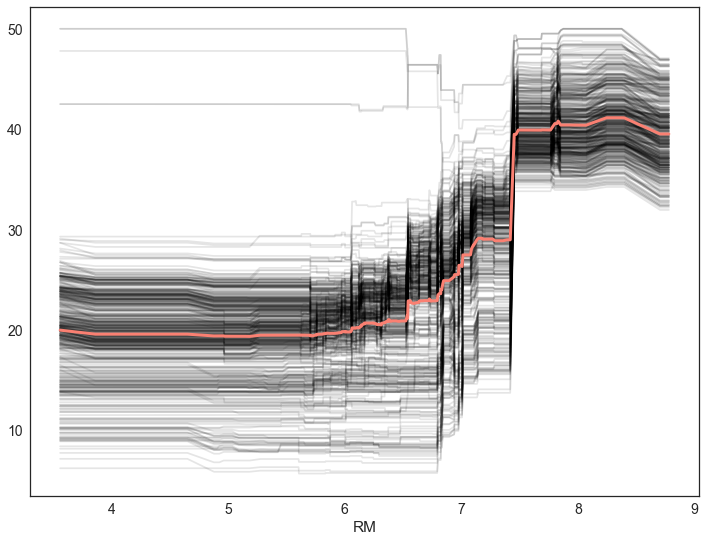

In [13]:
ax = ice_plot(ice_dict['RM'], c='k', alpha=0.1, plot_pdp=True, 
              pdp_kwargs={'color': 'salmon', 'linewidth': 3})
ax.set_xlabel('RM');

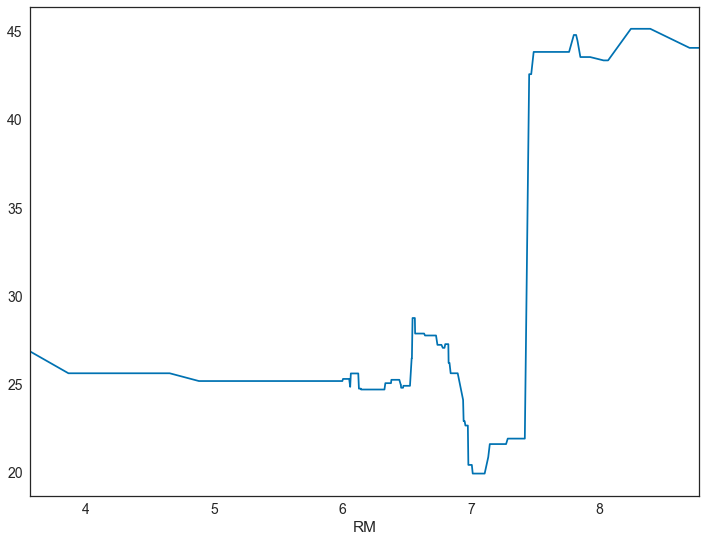

In [14]:
ice_dict['RM'].iloc[:,0].plot();

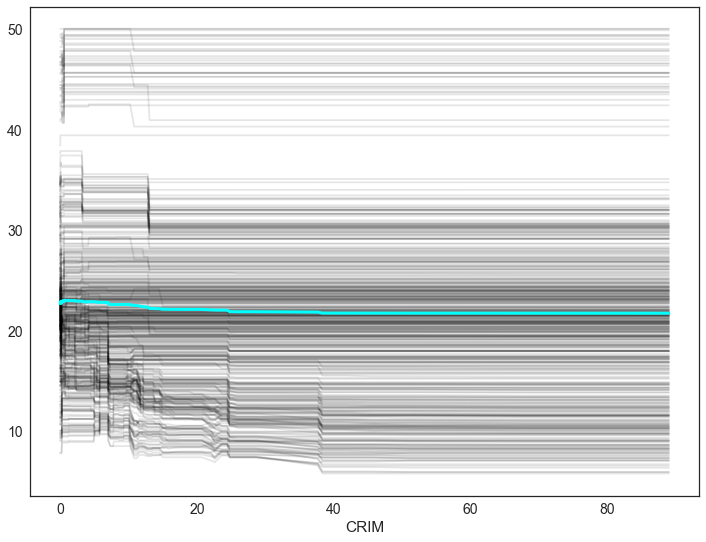

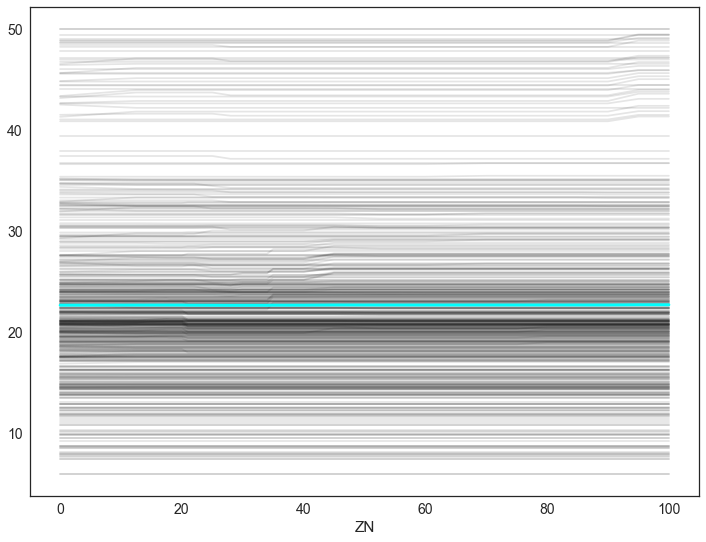

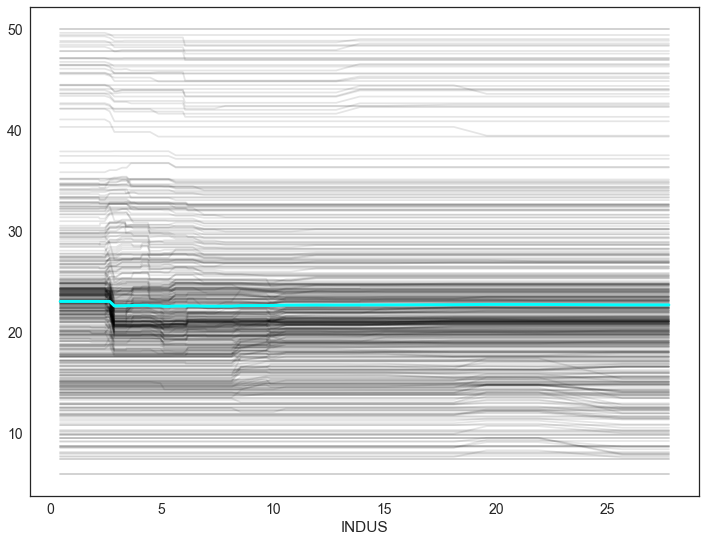

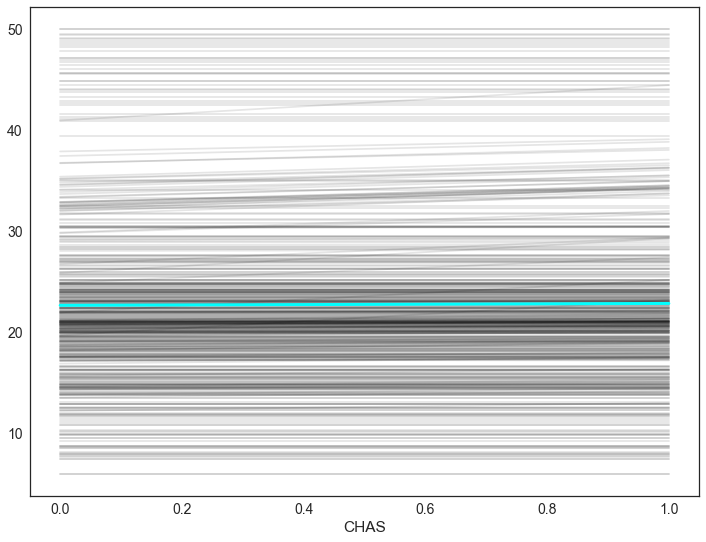

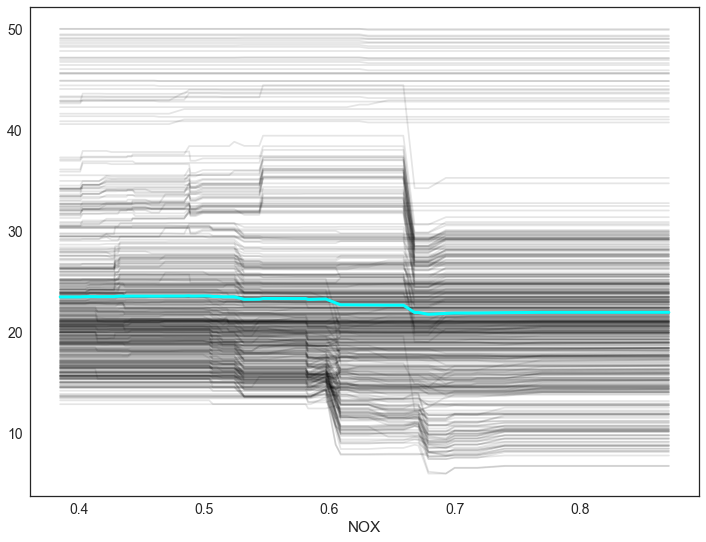

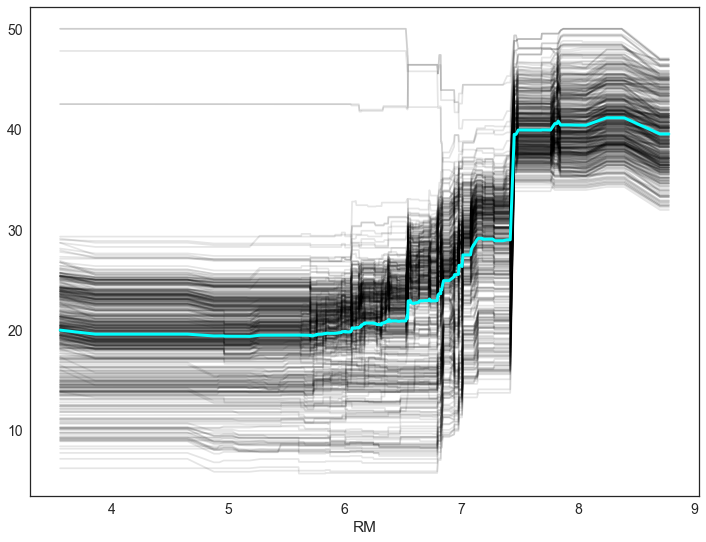

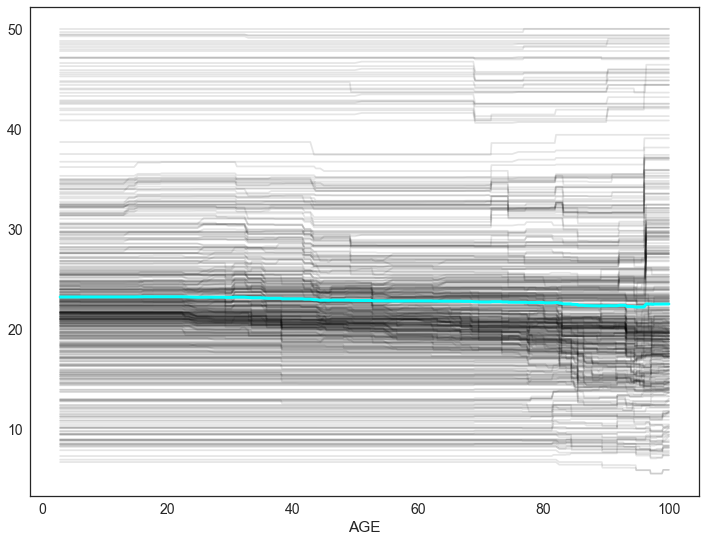

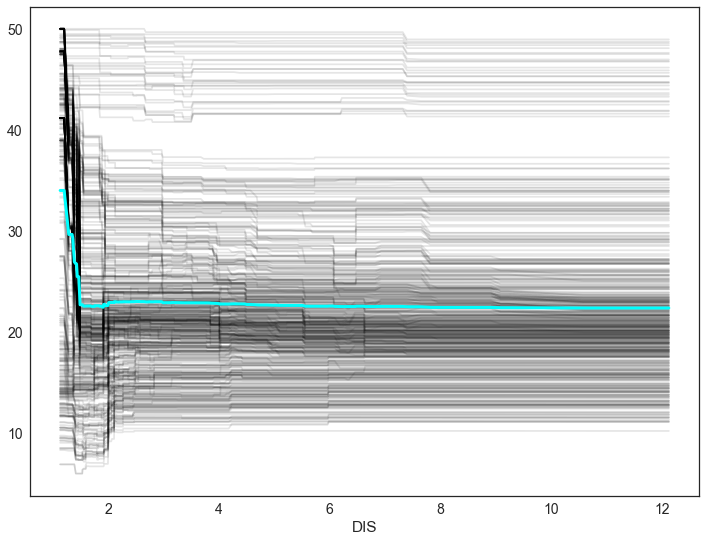

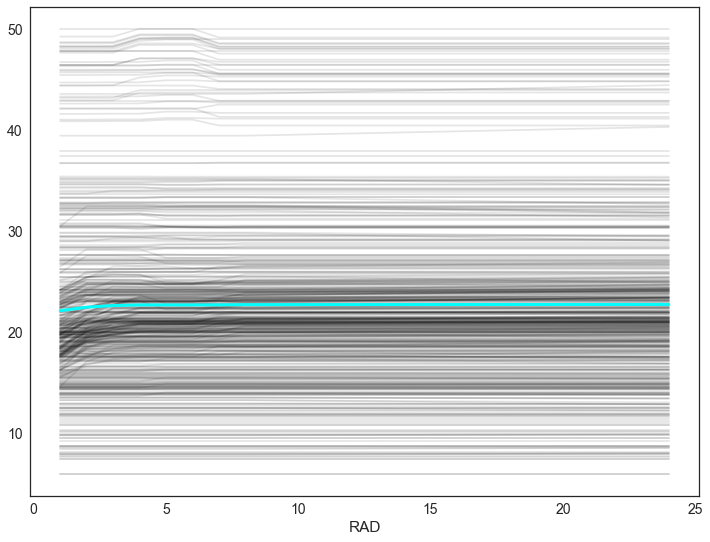

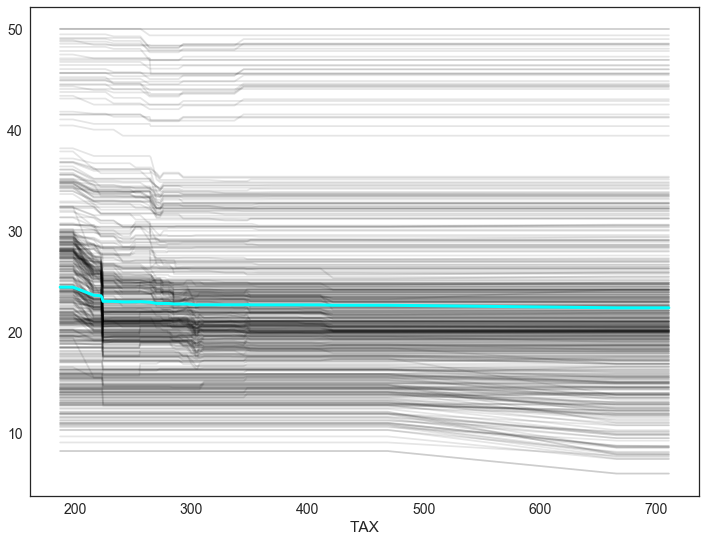

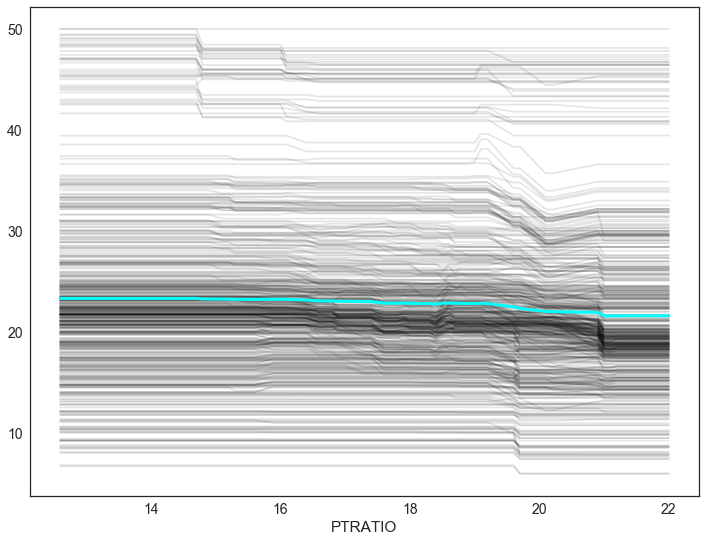

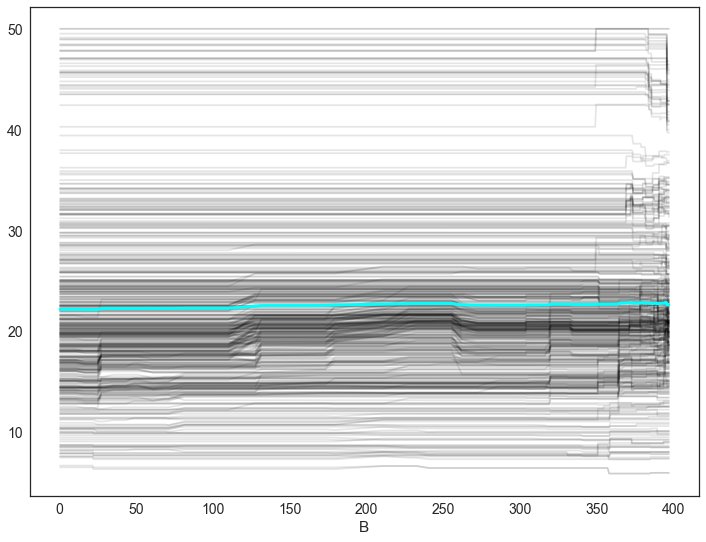

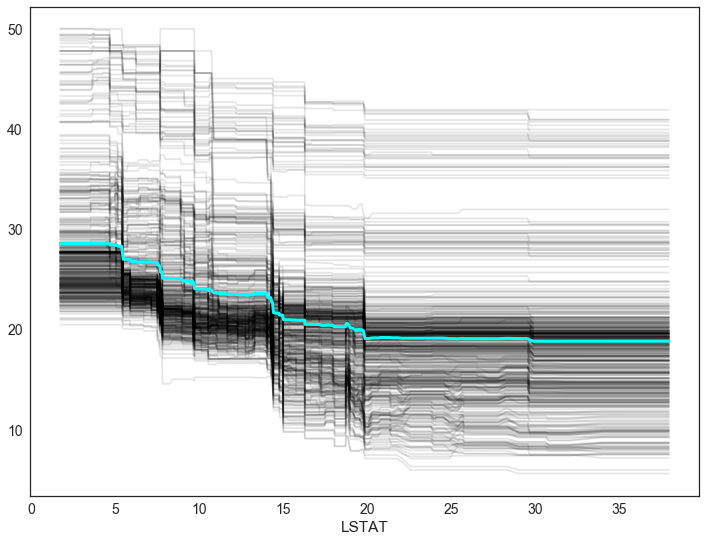

In [15]:
for col in ice_dict.keys():
    ax = ice_plot(ice_dict[col], c='k', alpha=0.1, plot_pdp=True, 
              pdp_kwargs={'color': 'aqua', 'linewidth': 3})
    ax.set_xlabel(col)
    plt.show()